****Introduction to the Dataset****

The project involves building a machine learning model to classify wines based on their chemical properties. The dataset used for this task is the Wine dataset, which consists of 13 features representing different chemical properties of wines, such as alcohol content, acidity levels, and phenolic content. The target variable is the class of wine, with three possible classes indicating different cultivars - Level 0, 1, and 2

The type of learning used in this project is unsupervised learning, as we are actively trying to find clusters in this dataset that can help us group the data. Specifically, we are performing multiclass classification, as there are more than two classes to predict. We will remove the target column which contains the labels and only focus on modeling the 13 features to properly cluster the data. 

To tackle this classification task, we employ algorithms such as K-Means clustering and Hierarchical clustering techniques. These algorithms are suitable for multiclass classification tasks and are known for their ability to handle complex datasets with high-dimensional feature spaces.

The goal of the project is to train machine learning models on the Wine dataset to accurately classify wines into their respective cultivar classes based on their chemical characteristics. By evaluating the performance of these models using metrics such as silhouette scores aim to identify the most effective algorithm for this classification task and gain insights into the factors influencing wine classification.

****Dataset Citation****

The Wine dataset used in this project is a well-known benchmark dataset in machine learning and is publicly available. The data was gathered through chemical analysis of wines produced in the same region in Italy but derived from three different cultivars. The features in the dataset represent various physicochemical properties of the wines, such as alcohol content, acidity levels, and phenolic content. The target variable is the cultivar class of the wines, with three classes indicating different cultivars.

It was originally introduced in the paper:

Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). Modeling wine preferences by data mining from physicochemical properties. Decision Support Systems, 47(4), 547-553.

In [68]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [69]:
# Load the Wine dataset and assign X and Y values
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

In [70]:
# Get the size of the dataset
num_samples, num_features = X.shape

# Get the data types of each feature
data_types = X.dtypes

# Get the size of the dataset in bytes
bytesize = X.memory_usage(deep=True).sum()

# Display the data description
print(f"Number of samples/rows: {num_samples}")
print(f"Number of features/columns: {num_features}")
print(f"Data type of each feature:\n{data_types}")
print(f"Size of the dataset: {bytesize} bytes")

Number of samples/rows: 178
Number of features/columns: 13
Data type of each feature:
alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object
Size of the dataset: 18640 bytes


In [71]:
# Concatenate the feature DataFrame with the target column
data = pd.concat([X, pd.DataFrame({'target': y})], axis=1)

# Create a Styler object and apply custom styling for a smaller table. 
styled_table = data.head().style \
    .set_table_styles([{
        'selector': 'thead',
        'props': [
            ('font-size', '12px'),
            ('font-weight', 'bold'),
            ('color', 'white'),
            ('background-color', 'teal')
        ]
    }, {
        'selector': 'tbody',
        'props': [
            ('font-size', '10px'),
            ('color', 'black')
        ]
    }, {
        'selector': 'th',
        'props': [
            ('text-align', 'center'),
            ('padding', '4px')
        ]
    }, {
        'selector': 'td',
        'props': [
            ('text-align', 'center'),
            ('padding', '2px')
        ]
    }])

# Display the styled table
styled_table

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.230000,1.710000,2.430000,15.600000,127.000000,2.800000,3.060000,0.280000,2.290000,5.640000,1.040000,3.920000,1065.000000,0
1,13.200000,1.780000,2.140000,11.200000,100.000000,2.650000,2.760000,0.260000,1.280000,4.380000,1.050000,3.400000,1050.000000,0
2,13.160000,2.360000,2.670000,18.600000,101.000000,2.800000,3.240000,0.300000,2.810000,5.680000,1.030000,3.170000,1185.000000,0
3,14.370000,1.950000,2.500000,16.800000,113.000000,3.850000,3.490000,0.240000,2.180000,7.800000,0.860000,3.450000,1480.000000,0
4,13.240000,2.590000,2.870000,21.000000,118.000000,2.800000,2.690000,0.390000,1.820000,4.320000,1.040000,2.930000,735.000000,0


<Figure size 864x576 with 0 Axes>

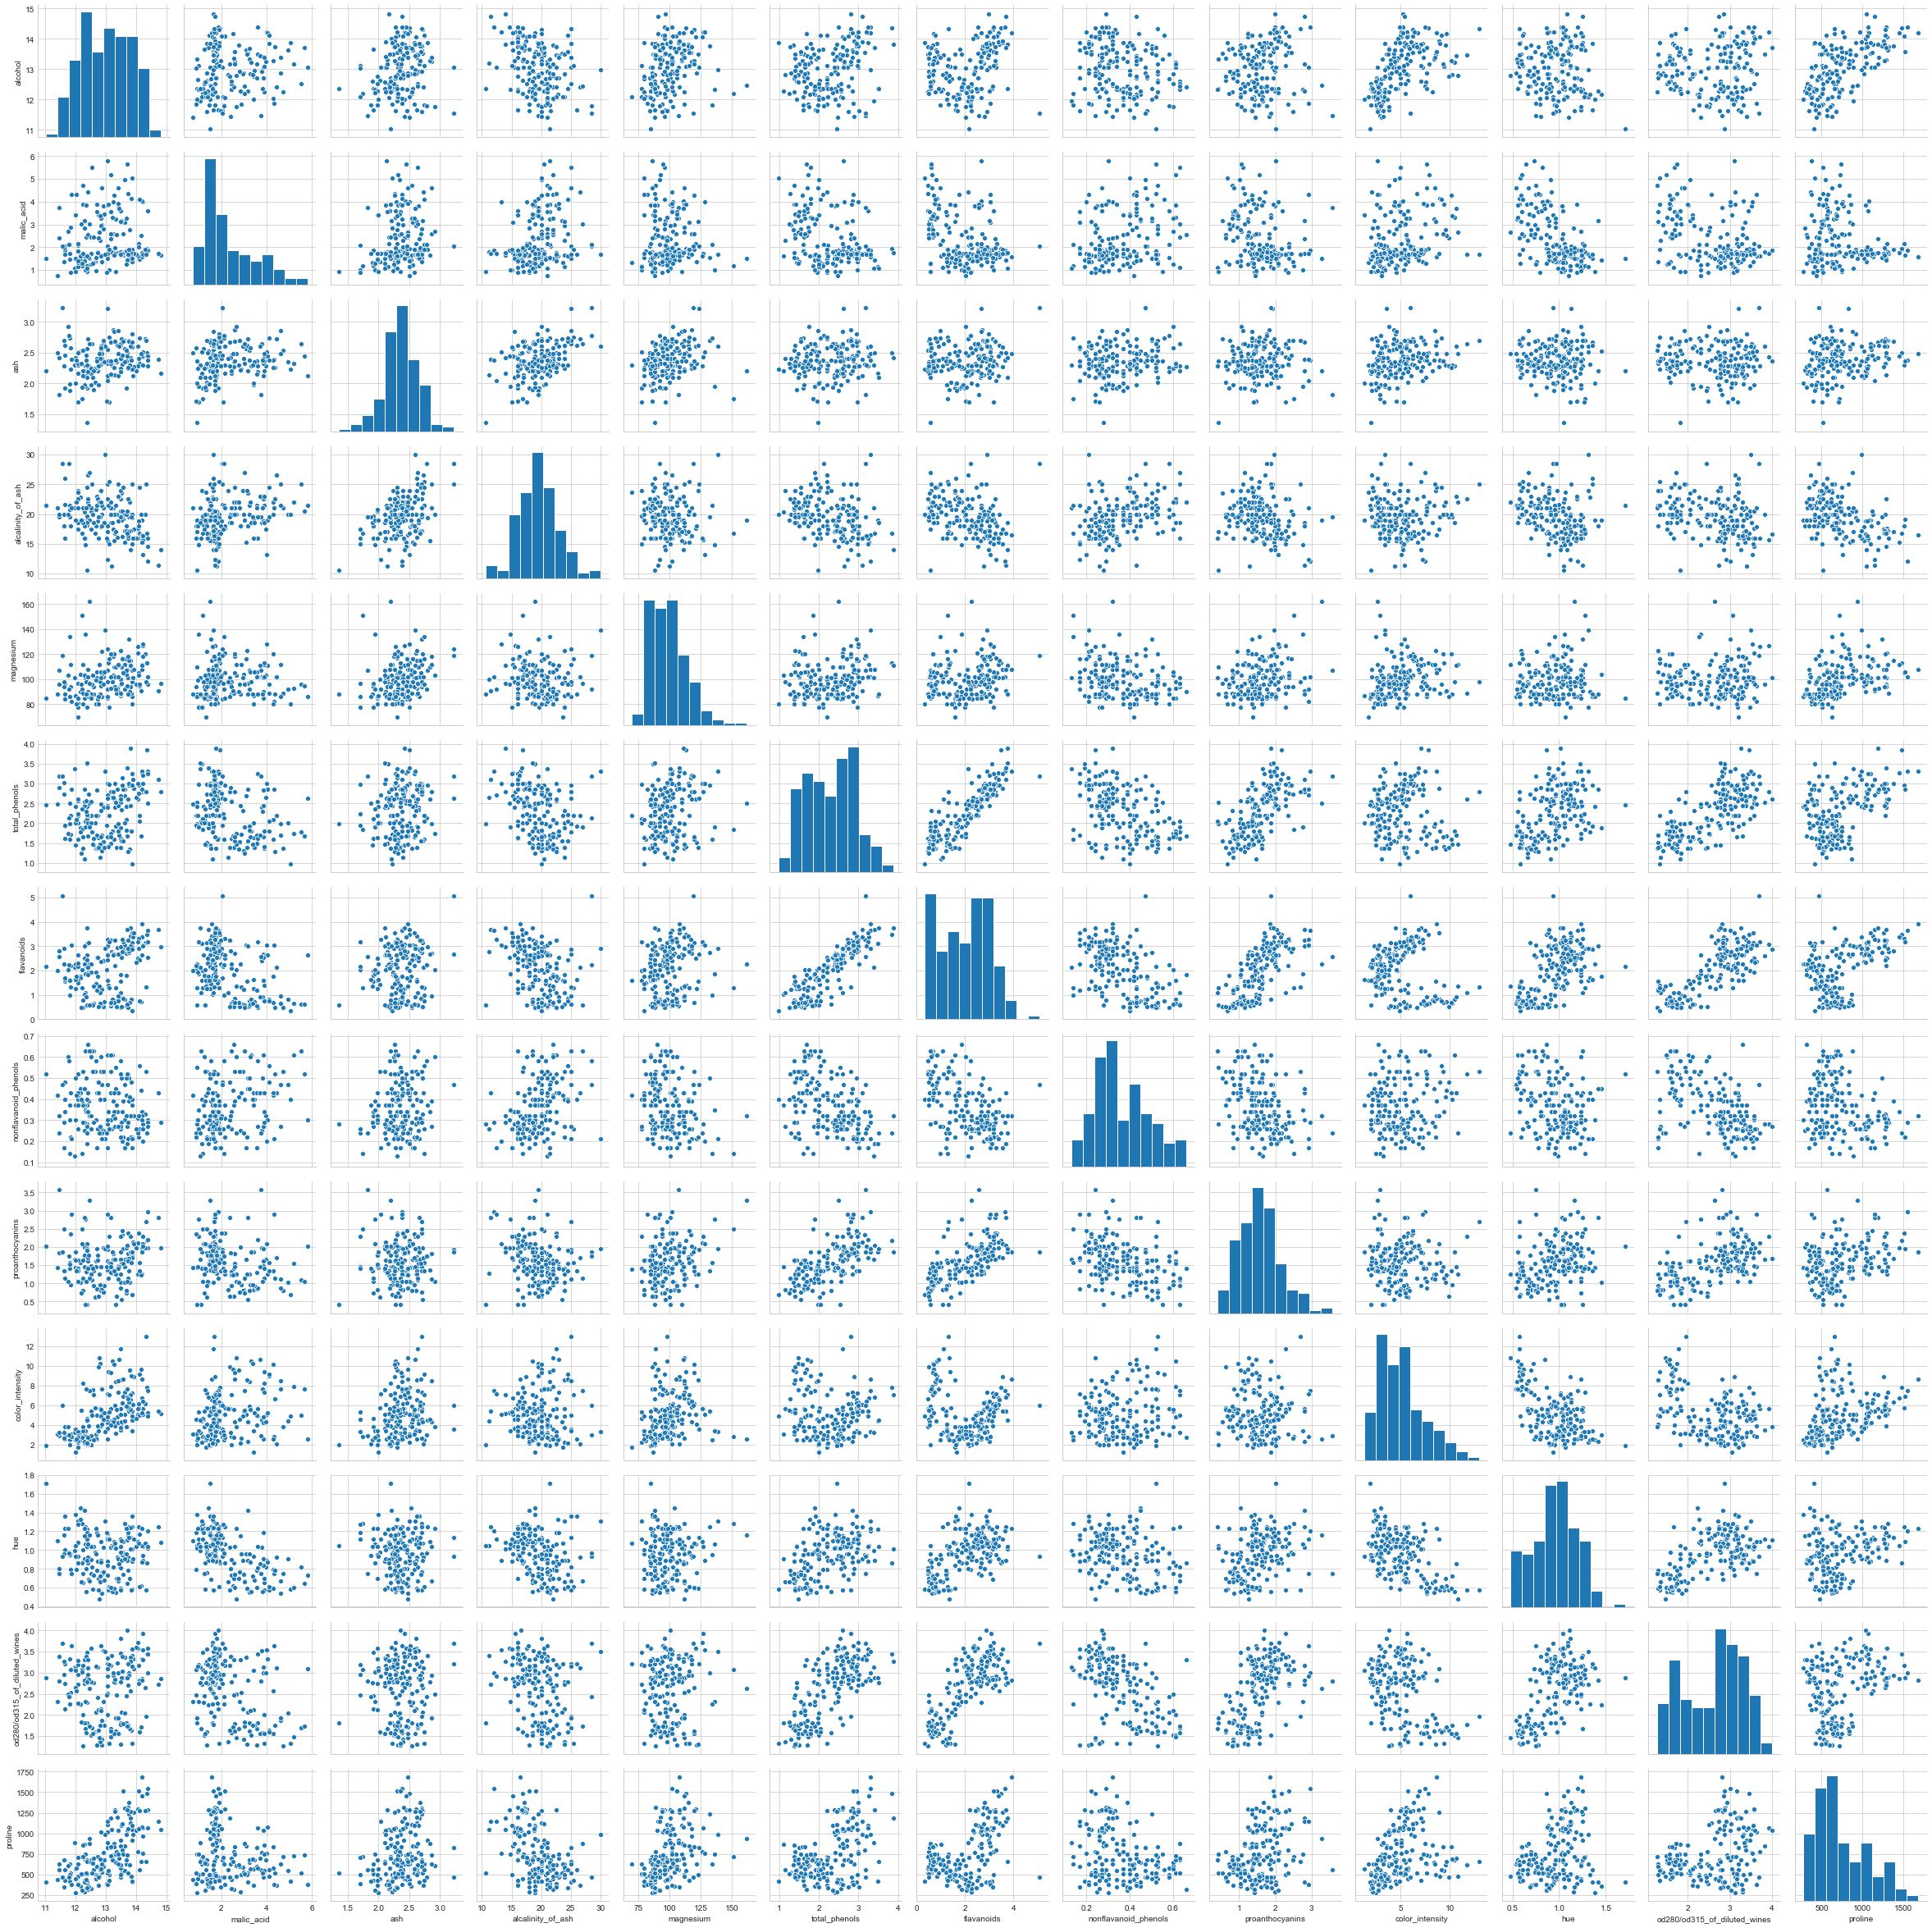

In [72]:
# Visualizing data distributions and correlations
plt.figure(figsize=(12, 8))
sns.pairplot(X)
plt.show()

In [74]:
# Checking for missing values
print("Missing Values:")
print(X.isnull().sum())

Missing Values:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


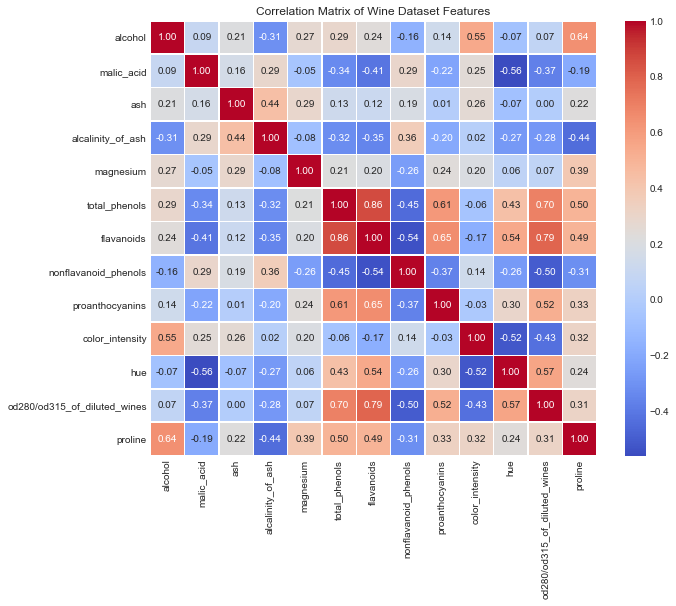

In [73]:
# Analyzing correlations between features
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Wine Dataset Features')
plt.show()

In [75]:
# Calculate the correlation matrix
correlation_matrix = X.corr()

# Create a mask for identifying highly correlated features
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Find pairs of highly correlated features
dropped_columns = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:  # Adjust the threshold as needed
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            if colname_i not in dropped_columns:
                dropped_columns.add(colname_j)

# Drop the highly correlated columns
X = X.drop(columns=dropped_columns)

# Display the new DataFrame after dropping highly correlated columns
print("Original DataFrame shape:", X.shape)
X = pd.DataFrame(X, columns= X.columns) 
print("DataFrame shape after dropping highly correlated columns:", X.shape)
print("Columns dropped due to high correlation:", dropped_columns) 


Original DataFrame shape: (178, 12)
DataFrame shape after dropping highly correlated columns: (178, 12)
Columns dropped due to high correlation: {'total_phenols'}


****Removal of Features for Higher Accuracy Model****

A decision was made to drop total_phenols because it is highly correlated with flavanoids. A correlation threshold of 0.8 was chosen based on the correlation matrix and the visual display seen in the scatter plots where therer is a high degree of correlation. This correlation may lead to redundant information and dilution of weights associated with the two variables when attempting to use the random forest method. Therefore, total_phenols was chosen to be dropped as a feature from this data set

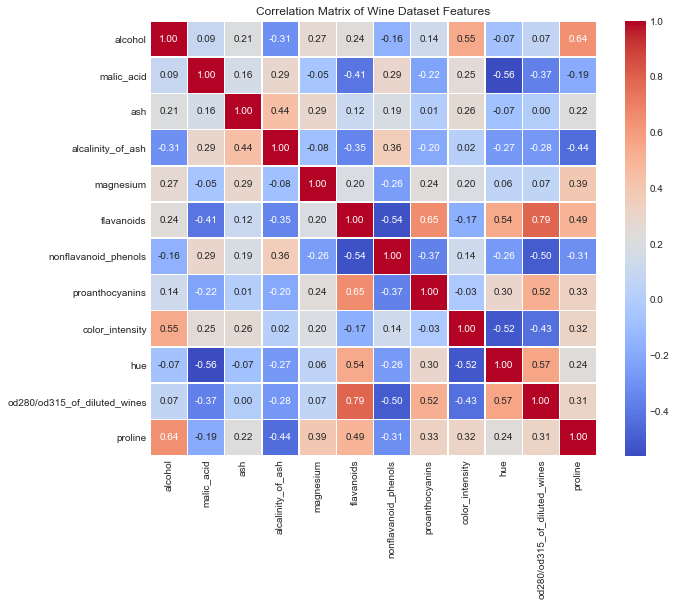

In [76]:
# Analyzing correlations between features
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Wine Dataset Features')
plt.show()

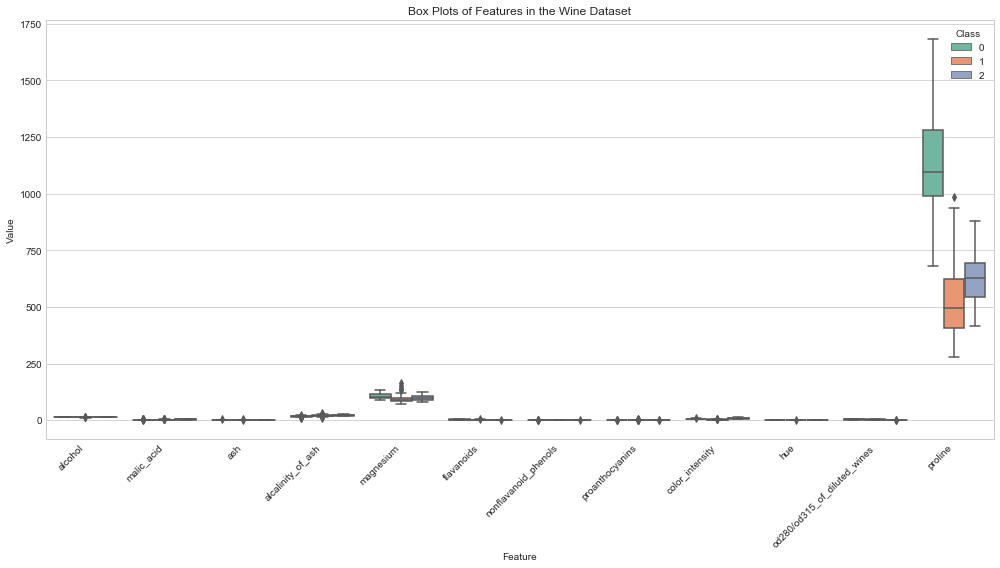

In [78]:
# Concatenate the features and target into a single DataFrame
data = pd.concat([X, pd.Series(y, name='target')], axis=1)

# Melt the DataFrame to create a long-form dataset suitable for box plots
data_melted = data.melt(id_vars='target', var_name='feature', value_name='value')

# Plot box plots for each feature
plt.figure(figsize=(14, 8))
sns.boxplot(x='feature', y='value', hue='target', data=data_melted, palette='Set2')
plt.title('Box Plots of Features in the Wine Dataset')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Class')
plt.tight_layout()
plt.show()


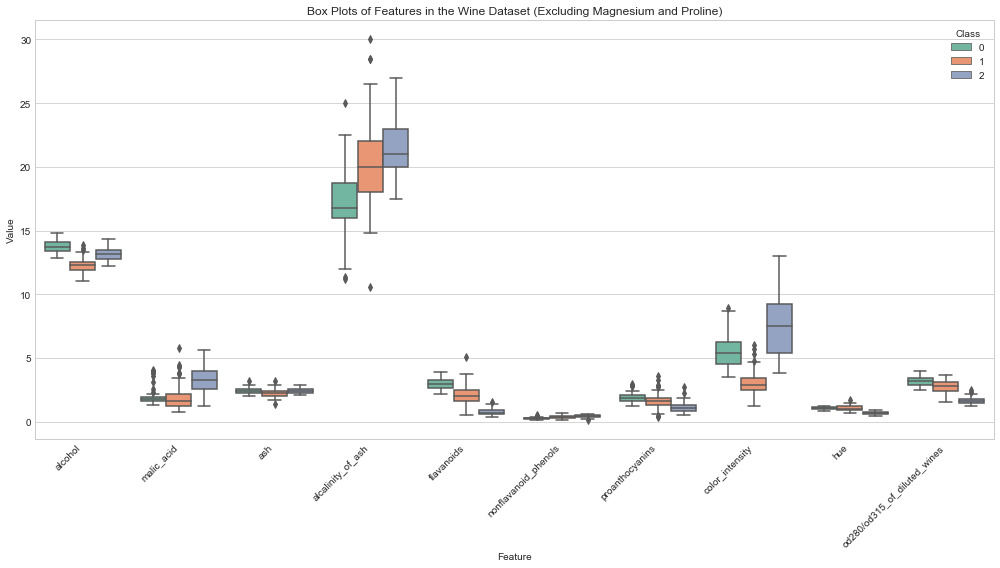

In [79]:
# Concatenate the features and target into a single DataFrame
data = pd.concat([X, pd.Series(y, name='target')], axis=1)

# Melt the DataFrame to create a long-form dataset suitable for box plots
data_melted = data.melt(id_vars='target', var_name='feature', value_name='value')

# Filter out 'magnesium' and 'proline' from the melted data
data_melted_filtered = data_melted[~data_melted['feature'].isin(['magnesium', 'proline'])]

# Plot box plots for each feature (excluding 'magnesium' and 'proline')
plt.figure(figsize=(14, 8))
sns.boxplot(x='feature', y='value', hue='target', data=data_melted_filtered, palette='Set2')
plt.title('Box Plots of Features in the Wine Dataset (Excluding Magnesium and Proline)')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Class')
plt.tight_layout()
plt.show()


****Cleaning of Data****

The box plots show a clear distinction between the 3 classes in each feature, showing that all of the features listed are important in distinguishing the unique distributions in each class. I initially removed magnesium and proline from the data set but found that the accuracy and recall of the random forest significantly dropped. Therefore, the spread of these data sets are not a good indication of these sets being out liers and the information contained in these features are valuable in creating an accurate model. 

In [80]:
# Preprocessing: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [81]:
# Define the number of clusters
n_clusters = 3

# K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [82]:
# Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

****K-Means vs Hierarchical Clustering****

Hierarchical clustering offers several advantages, including its intuitive interpretation and ability to visualize hierarchical relationships through dendrograms. It does not require specifying the number of clusters beforehand and can capture clusters of varying sizes and shapes. Moreover, it can handle outliers effectively by forming single-member clusters. However, hierarchical clustering tends to be computationally intensive and may not scale well to large datasets. Additionally, it can be sensitive to the choice of distance metric and linkage method, leading to different cluster structures.

On the other hand, K-means clustering is computationally efficient and can handle large datasets with a relatively low computational cost. It is straightforward to implement and scales well to high-dimensional data. K-means also allows for easy interpretation of results and can be robust to noisy data. However, K-means requires specifying the number of clusters beforehand, which can be challenging in practice. It is also sensitive to the initial selection of cluster centroids, and convergence to suboptimal solutions can occur. Moreover, K-means may struggle with clusters of different sizes and shapes, as it assumes spherical clusters of equal variance.

In [83]:
# Compute silhouette score
kmeans_silhouette_score = silhouette_score(X_scaled, kmeans_labels)

# Compute silhouette samples
kmeans_silhouette_samples = silhouette_samples(X_scaled, kmeans_labels)

In [84]:
# Compute silhouette score
hierarchical_silhouette_score = silhouette_score(X_scaled, hierarchical_labels)

# Compute silhouette samples
hierarchical_silhouette_samples = silhouette_samples(X_scaled, hierarchical_labels)

In [85]:
# Outcome of Silhouette Score
print("K-means Silhouette Score:", kmeans_silhouette_score)
print("Hierarchical Silhouette Score:", hierarchical_silhouette_score)

print("\nK-means Cluster Sizes:")
print(pd.Series(kmeans_labels).value_counts())

print("\nHierarchical Cluster Sizes:")
print(pd.Series(hierarchical_labels).value_counts())

K-means Silhouette Score: 0.29002599080284863
Hierarchical Silhouette Score: 0.28044308412094854

K-means Cluster Sizes:
2    63
0    63
1    52
dtype: int64

Hierarchical Cluster Sizes:
1    65
2    57
0    56
dtype: int64


In [86]:
#assign target to y
y = wine.target

# Get the counts of each unique value in the target column
target_counts = pd.Series(y).value_counts()

# Display the counts
print("Target Column Counts:")
print(target_counts)


Target Column Counts:
1    71
0    59
2    48
dtype: int64


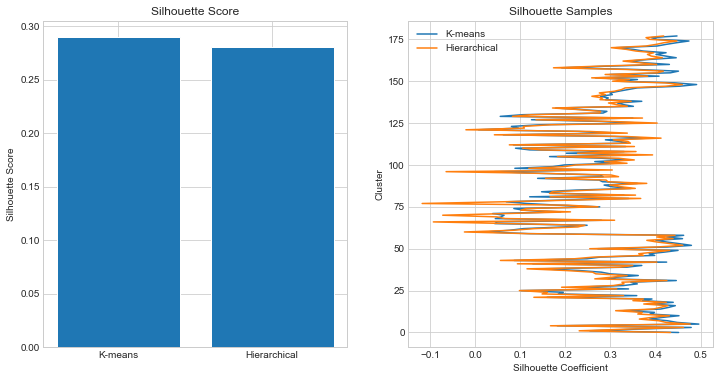

In [87]:
# Plot silhouette scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(['K-means', 'Hierarchical'], [kmeans_silhouette_score, hierarchical_silhouette_score])
plt.title('Silhouette Score')
plt.ylabel('Silhouette Score')

# Plot silhouette samples
plt.subplot(1, 2, 2)
plt.plot(kmeans_silhouette_samples, range(len(X_scaled)), label='K-means')
plt.plot(hierarchical_silhouette_samples, range(len(X_scaled)), label='Hierarchical')
plt.title('Silhouette Samples')
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Cluster')
plt.legend()
plt.show()

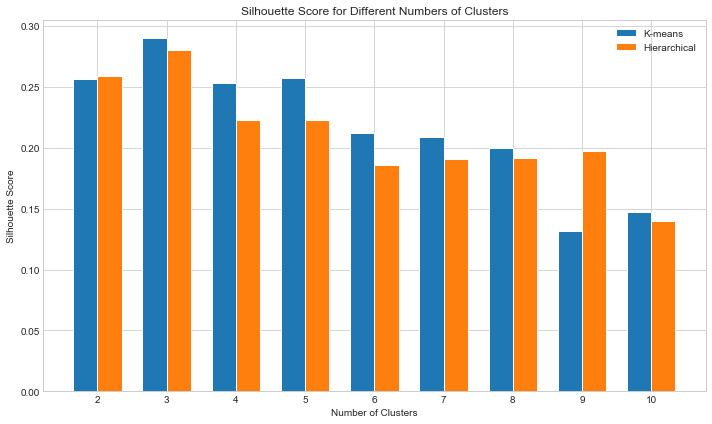

In [88]:
#Cluster Range
cluster_range = range(2, 11)

# Initialize lists to store silhouette scores
kmeans_scores = []
hierarchical_scores = []

# Iterate over each number of clusters
for n_clusters in cluster_range:
    # K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    kmeans_scores.append(silhouette_score(X_scaled, kmeans_labels))
    
    # Hierarchical clustering
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    hierarchical_labels = hierarchical.fit_predict(X_scaled)
    hierarchical_scores.append(silhouette_score(X_scaled, hierarchical_labels))

# Plot silhouette scores side by side
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(cluster_range))

plt.bar(index, kmeans_scores, bar_width, label='K-means')
plt.bar([i + bar_width for i in index], hierarchical_scores, bar_width, label='Hierarchical')

plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks([i + bar_width/2 for i in index], cluster_range)
plt.legend()
plt.tight_layout()
plt.show()

****Results and Conclusions****

The difference in silhouette scores between K-means and hierarchical clustering for three clusters suggests that, in this specific case, K-means initially outperforms hierarchical clustering in terms of cluster separation and cohesion. However, as the number of clusters increases, hierarchical clustering starts to exhibit higher silhouette scores, indicating improved clustering quality.

The higher variability observed in the silhouette sample graph for hierarchical clustering with three clusters suggests that the clusters may not be well-separated or compact, leading to a wider range of silhouette coefficients. This variability may indicate that the hierarchical clustering algorithm struggles to define distinct clusters effectively when the number of clusters is limited.

Overall, these observations highlight the trade-offs between K-means and hierarchical clustering. While K-means may provide better initial clustering results for a small number of clusters, hierarchical clustering may offer improved performance as the complexity of the clustering task increases. Additionally, the higher variability in silhouette coefficients for hierarchical clustering suggests that the algorithm may be more sensitive to the choice of parameters and may require careful tuning for optimal results. Including these insights in the project prompt can provide context for understanding the advantages and limitations of different clustering methods and guide future analyses.